# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

#Import cities from csv
city_list = pd.read_csv("worldcities.csv")

#Choose a random sample of 1500 cities
random_cities = city_list.sample(n=1500)


In [27]:
#check list
#random_cities["Country"] = random_cities["Country"].upper()
random_cities.head()

,Country,City,Latitude,Longitude
834,au,emerald,-23.522961,148.157837
5,ad,ordino,42.550000,1.533333
36218,ru,kasumkent,41.677248,48.146009
25139,na,ongandjera,-17.883333,15.066667
30382,ph,taloy,16.333333,120.500000


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# #create a series of cities
city_search_list = random_cities.City
# #collect the api calls
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# query_url = f"{url}appid={api_key}&units={units}&q=london"
# response = requests.get(query_url).json()
# print(json.dumps(response,indent=4,sort_keys=True))

In [29]:
name = []
clouds = []
date = []
humidity = []
temp_max = []
wind_speed = []

list_len = len(city_search_list)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
record_cnt = 1

for city in city_search_list:
    print(f"Processing Record {record_cnt} of {list_len} | {city}")
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
    
    try:
        name.append(response["name"].lower())
    except KeyError:
        print("That key doesn't exist")
        
    try:
        clouds.append(response["clouds"]["all"])
    except KeyError:
        print("That key doesn't exist")
            
    try:
        date.append(response["dt"])
    except KeyError:
        print("That key doesn't exist")
                
    try:
        humidity.append(response["main"]["humidity"])
    except KeyError:
        print("That key doesn't exist")
                    
    try:
        temp_max.append(response["main"]["temp_max"])
    except KeyError:
        print("That key doesn't exist")
                        
    try:
        wind_speed.append(response["wind"]["speed"])
    except KeyError:
        print("That key doesn't exist")
        
    record_cnt = record_cnt + 1


Processing Record 1 of 500 | emerald
Processing Record 2 of 500 | ordino
Processing Record 3 of 500 | kasumkent
Processing Record 4 of 500 | ongandjera
Processing Record 5 of 500 | taloy
Processing Record 6 of 500 | amargosa
Processing Record 7 of 500 | monjaras
Processing Record 8 of 500 | dagup
Processing Record 9 of 500 | goiana
Processing Record 10 of 500 | cap-aux-meules
Processing Record 11 of 500 | sinjai
Processing Record 12 of 500 | ilampillai
Processing Record 13 of 500 | dieburg
Processing Record 14 of 500 | udpura
Processing Record 15 of 500 | mislinja
Processing Record 16 of 500 | kyzyl-mazhalyk
Processing Record 17 of 500 | duluth
Processing Record 18 of 500 | iloilo
Processing Record 19 of 500 | lebyazhye
Processing Record 20 of 500 | bretzfeld
Processing Record 21 of 500 | encarnacion
Processing Record 22 of 500 | pinheiro machado
Processing Record 23 of 500 | strabychovo
Processing Record 24 of 500 | villavieja
Processing Record 25 of 500 | alaca
Processing Record 26 o

Processing Record 175 of 500 | logumkloster
Processing Record 176 of 500 | rixheim
Processing Record 177 of 500 | taureni
Processing Record 178 of 500 | loures
Processing Record 179 of 500 | ise
Processing Record 180 of 500 | melbourne
Processing Record 181 of 500 | qarayeri
Processing Record 182 of 500 | linmansangan
Processing Record 183 of 500 | miamisburg
Processing Record 184 of 500 | agrij
Processing Record 185 of 500 | little ferry
Processing Record 186 of 500 | vahan
Processing Record 187 of 500 | bargal
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 188 of 500 | varhaug
Processing Record 189 of 500 | secusigiu
Processing Record 190 of 500 | nurlat
Processing Record 191 of 500 | sanchor
Processing Record 192 of 500 | isabang
Processing Record 193 of 500 | chignahuapan
Processing Record 194 of 500 | wote
Processing Record 195 of 500 | canoas
Processing Record 196 of 500 |

Processing Record 349 of 500 | glassford
Processing Record 350 of 500 | krasnyy gulyay
Processing Record 351 of 500 | tanay
Processing Record 352 of 500 | bulit
Processing Record 353 of 500 | aguazul
Processing Record 354 of 500 | ust-ordynskiy
Processing Record 355 of 500 | hollywood
Processing Record 356 of 500 | khon buri
Processing Record 357 of 500 | livingstonia
Processing Record 358 of 500 | loding
Processing Record 359 of 500 | budaors
Processing Record 360 of 500 | star
Processing Record 361 of 500 | alcala
Processing Record 362 of 500 | rusanj
Processing Record 363 of 500 | naudero
Processing Record 364 of 500 | neos marmaras
Processing Record 365 of 500 | la campana
Processing Record 366 of 500 | hartselle
Processing Record 367 of 500 | joniskis
Processing Record 368 of 500 | turmalina
Processing Record 369 of 500 | atalaya
Processing Record 370 of 500 | pijao
Processing Record 371 of 500 | siguiri
Processing Record 372 of 500 | danesti
Processing Record 373 of 500 | zelenyy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
raw_weather_data = {"City": name,
                   "Cloudiness": clouds,
                   "Date": date,
                   "Humidity": humidity,
                   "Max Temp": temp_max,
                   "Wind Speed": wind_speed}
weather_data = pd.DataFrame(raw_weather_data)
#weather_data

In [31]:
city_weather_data = pd.merge(weather_data,random_cities, on="City")
city_weather_data

,City,Cloudiness,Date,Humidity,Max Temp,Wind Speed,Country,Latitude,Longitude
0,emerald,90,1553808360,100,71.60,6.93,au,-23.522961,148.157837
1,ordino,0,1553808425,75,46.99,1.48,ad,42.550000,1.533333
2,kasumkent,80,1553808465,96,29.78,1.70,ru,41.677248,48.146009
3,ongandjera,64,1553808465,57,73.70,6.40,na,-17.883333,15.066667
4,taloy,24,1553808465,92,68.48,2.48,ph,16.333333,120.500000
5,amargosa,56,1553808465,73,76.67,9.86,br,-13.033333,-39.600000
6,monjaras,40,1553806800,41,98.60,4.70,hn,13.200556,-87.374167
7,dagup,36,1553808466,93,63.53,2.19,ph,16.637222,120.445556
8,goiana,75,1553806800,88,82.40,8.05,br,-7.550000,-34.983333
9,cap-aux-meules,75,1553806800,64,33.80,21.92,ca,47.383333,-61.866667


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

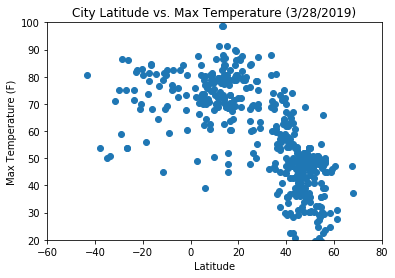

In [67]:
import datetime

now = datetime.datetime.now()

#print(f"{now.month}")


x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Max Temp"]
plt.xlim(-60,80)
plt.ylim(20,100)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Max Temperature ({now.month}/{now.day}/{now.year})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.show()


#### Latitude vs. Humidity Plot

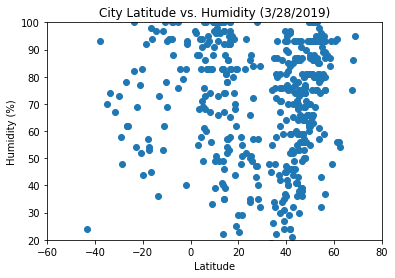

In [68]:
x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Humidity"]
plt.xlim(-60,80)
plt.ylim(20,100)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Humidity ({now.month}/{now.day}/{now.year})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()



#### Latitude vs. Cloudiness Plot

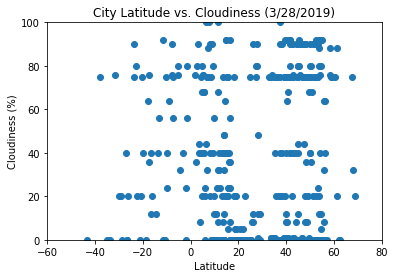

In [70]:
x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Cloudiness"]
plt.xlim(-60,80)
plt.ylim(0,100)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Cloudiness ({now.month}/{now.day}/{now.year})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()



#### Latitude vs. Wind Speed Plot

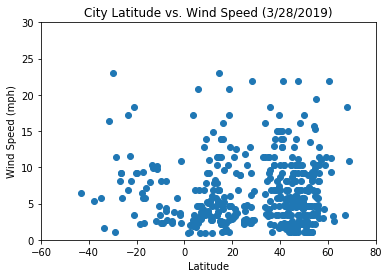

In [71]:
x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Wind Speed"]
plt.xlim(-60,80)
plt.ylim(0,30)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Wind Speed ({now.month}/{now.day}/{now.year})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

